In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
%matplotlib inline

загружу все столбцы в соответвующие листы

In [81]:
df = pd.read_excel('DataSet.xlsx')

In [65]:
prise = df['Price'].to_list()

In [66]:
Qty_stock = df['Qty_stock'].to_list()

In [67]:
Main_supplier_object = df['Main_supplier_object'].to_list()

In [68]:
Nomenclature_group = df['Nomenclature_group'].to_list()

In [69]:
Service = df['Service'].to_list()

In [70]:
sharto = df['Sharto'].to_list()

In [71]:
Storage_unit = df['Storage_unit'].to_list()

In [72]:
Accounting_Characteristics = df['Accounting_Characteristics'].to_list()

In [73]:
Kind = df['Kind'].to_list()

In [74]:
remaining_amount = df['Remaining_amount'].to_list()

In [75]:
Unit_of_reconciliation = df['Unit_of_reconciliation'].to_list()

Переведу текстовые значения в соответсвующие числовые. Например, для столбца Accounting_Characteristics да = 1, нет = 1

In [100]:
i = 0
AC = []
while i < 1157:
    if df.Accounting_Characteristics[i] == 'Да':
        AC.append(1)
    if df.Accounting_Characteristics[i] == 'Нет':
        AC.append(0)
    i = i + 1

In [77]:
i = 0
Kind_New = []
while i < 1157:
    if df.Kind[i] == 'Товар':
        Kind_New.append(1)
    if df.Kind[i] == 'Материал':
        Kind_New.append(0)
    if df.Kind[i] == 'Услуга':
        Kind_New.append(3)
    i = i + 1

In [78]:
cor = np.corrcoef(prise, sharto)[0,1]

In [79]:
df2 = pd.read_excel('DataSet_izd.xlsx')

Столбец Nоmenclature_group тоже весьма бесмысленный, тк как там либо значение "товары" либо пропуск

In [80]:
#тут непонятно в чем ошибка
i = 0
Unit_of_reconciliation_izm = []
while i < 1157:
    if df2.Unit_of_reconciliation[i] == 'м2':
        Unit_of_reconciliation_izm.append(1)
    if df2.Unit_of_reconciliation[[i] == 'шт':
        Unit_of_reconciliation_izm.append(0)
    if df2.Unit_of_reconciliation[i] == 'бут':
        Unit_of_reconciliation_izm.append(2)
    if df2.Unit_of_reconciliation[i] == 'уп':
        Unit_of_reconciliation_izm.append(3)
    if df2.Unit_of_reconciliation[i] == 'т':
        Unit_of_reconciliation_izm.append(4)
    if df2.Unit_of_reconciliation[i] == 'м3':
        Unit_of_reconciliation_izm.append(5)
    if df2.Unit_of_reconciliation[i] == 'пог. м':
        Unit_of_reconciliation_izm.append(6)
    if df2.Unit_of_reconciliation[i] == 'км.':
        Unit_of_reconciliation_izm.append(7)
    if df2.Unit_of_reconciliation[i] == 'Рулон':
        Unit_of_reconciliation_izm.append(8)  
    if df2.Unit_of_reconciliation[i] == 'г':
        Unit_of_reconciliation_izm.append(9) 
    if df2.Unit_of_reconciliation[i] == 'л':
        Unit_of_reconciliation_izm.append(10)
    if df2.Unit_of_reconciliation[i] == 'м':
        Unit_of_reconciliation_izm.append(11)
    i = i + 1

SyntaxError: invalid syntax (<ipython-input-80-456529693b1a>, line 9)

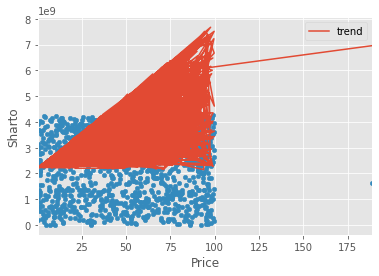

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
ax = df.plot.scatter('Price', 'Sharto')
z = np.polyfit(df['Price'], df['Sharto'], 1)
p = np.poly1d(z)
df['trend'] = p(df.Remaining_amount)
df.plot(x='Price', y='trend', ax=ax)
plt.show()

In [108]:
def histogram(df, n_bins, cumulative=False, x_label = "", y_label = "", title = ""):
    _, ax = plt.subplots()
    ax.hist(df, n_bins = n_bins, cumulative = cumulative, color = '#539caf')
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)


In [106]:
histogram

<function __main__.histogram(df, n_bins, cumulative=False, x_label='', y_label='', title='')>

In [109]:
cor1 = np.corrcoef(prise, sharto)

In [110]:
cor1 #корреляции почти нет

array([[1.        , 0.00131095],
       [0.00131095, 1.        ]])

In [111]:
cor2 = np.corrcoef(prise, Kind_New)

In [112]:
cor2 #есть маленькая отрицательная корреляция

array([[ 1.        , -0.03612849],
       [-0.03612849,  1.        ]])

In [113]:
cor3 = np.corrcoef(AC, Kind_New)

In [114]:
cor3 #есть небольшая положительная корреляция

array([[1.        , 0.08252031],
       [0.08252031, 1.        ]])

In [116]:
cor4 = np.corrcoef(Qty_stock, sharto)

In [117]:
cor4 #почти нет корреляции

array([[1.        , 0.01370423],
       [0.01370423, 1.        ]])

In [118]:
cor5 = np.corrcoef(prise, Qty_stock)

In [119]:
def histogram_intersection(a, b):

    v = np.minimum(a, b).sum().round(decimals=1)

    return v

df = pd.DataFrame([(.2, .3), (.0, .6), (.6, .0), (.2, .1)],

                  columns=['dogs', 'cats'])

df.corr(method=histogram_intersection)
      dogs  cats
dogs   1.0   0.3
cats   0.3   1.0cor5 #есть явновыраженная корреляция

array([[1.00000000e+00, 1.94062081e-05],
       [1.94062081e-05, 1.00000000e+00]])

In [122]:
def histogram_intersection(a, b):

    v = np.minimum(a, b).sum().round(decimals=1)

    return v

df.corr(method=histogram_intersection)

,Number_PP,Sharto,Price,Qty_stock,Remaining_amount,trend
Number_PP,1.0,6.699030e+05,56813.0,405144.0,634305.0,6.699030e+05
Sharto,669903.0,1.000000e+00,58740.2,565883.0,28729743.2,2.340252e+12
Price,56813.0,5.874020e+04,1.0,56416.3,49660.4,5.874020e+04
Qty_stock,405144.0,5.658830e+05,56416.3,1.0,556143.4,5.658830e+05
Remaining_amount,634305.0,2.872974e+07,49660.4,556143.4,1.0,2.872974e+07
trend,669903.0,2.340252e+12,58740.2,565883.0,28729743.2,1.000000e+00
